In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_visualize(csv_file, row_index):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the label and image data
    label = df.iloc[row_index, -1]  # Assuming the last column contains the labels
    image_data = df.iloc[row_index, :-1].values  # Extract pixel values
    
    # Reshape to 28x28 for visualization
    image = image_data.reshape(28, 28)
    
    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

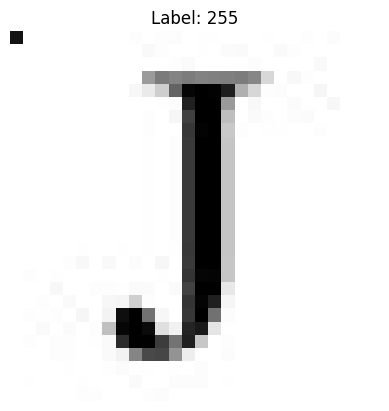

In [ ]:
# Example usage (replace 'dataset.csv' with the actual file name and specify a row index)
load_and_visualize(r"C:\Users\DELL\Downloads\typedCSV.csv", 20000)   

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

def train_mlp(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Filter only labels 0-35
    df = df[df.iloc[:, 0] <= 35]
    
    # Split into features and labels
    X = df.iloc[:, 1:].values / 255.0  # Normalize pixel values
    y = df.iloc[:, 0].values
    
    # Convert to PyTorch tensors
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
    y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Define the MLP model
    class MLP(nn.Module):
        def __init__(self):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(784, 512)
            # self.fc2 = nn.Linear(1024, 512)
            self.fc2 = nn.Linear(512, 256)
            self.fc3 = nn.Linear(256, 128)
            self.fc4 = nn.Linear(128, 36)  # 36 output classes (0-35)
            self.relu = nn.ReLU()
        
        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.relu(self.fc3(x))
            # x = self.relu(self.fc4(x))
            x = self.fc4(x)
            return x
    
    model = MLP()
    
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    epochs = 10
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")
    
    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    
    print(f'Test Accuracy: {correct / total:.4f}')
    
    return model

In [9]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    model_size = (total_params * 4) / (1024 * 1024)  # Convert bytes to MB
    print(f"Total Parameters: {total_params}")
    print(f"Model Size: {model_size:.2f} MB")
    return model_size

In [1]:
# # Example usage
# model = train_mlp(r"C:\Users\DELL\Downloads\typedCSV.csv")

In [ ]:
# torch.save(model.state_dict(), "embedded_mlp_model_4layers.pth")
# print("Model saved successfully!")

Model saved successfully!
